In [163]:
import pandas as pd
import numpy as np
import import_ipynb
import isee_def
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
isee_machine = pd.read_csv('./data/isee_machine_NG_enc.csv')
cycle_prod = pd.read_excel('./data/cycle-product.xlsx')

merged_df = pd.merge(isee_machine, cycle_prod, how='left', left_on='CycleNum', right_on='cycle')
print(len(merged_df))
merged_df= merged_df.dropna()
print(len(merged_df))
merged_df = merged_df.rename(columns={'產品名稱':'ProductName', '產品編號':'ProductNum'})
merged_df = merged_df.reset_index(drop=True)
merged_df['NG_Label']= merged_df['NG'] + merged_df['NG5']

236536
221506


-- 결측값: 12373

- up_list: unique product list
- df: up_list[2]만 (제품:'PL03877-03000')

In [175]:
up_list = merged_df['ProductNum'].unique()
df = merged_df[merged_df['ProductNum']==up_list[0]]

feature = isee_def.get_analy_enc_df(df)

y_label = df[['NG5','CycleNum','NG_Label']]
scaled_X = RobustScaler().fit_transform(feature)
len(feature), len(y_label), scaled_X.shape

(90408, 90408, (90408, 18))

### Clustering
- kmeans

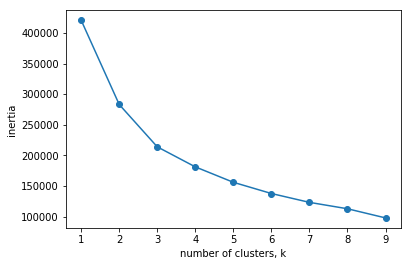

In [75]:
# 군집갯수 정하기
"""
Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다, 
이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.
"""
ks = range(1,10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    inertias.append(model.inertia_)

    

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [76]:
clustering = KMeans(n_clusters=6, random_state=42).fit(scaled_X)
cluster_label = clustering.labels_

In [ ]:
# label 모음집
df['Cluster_label'] = cluster_label+1
#df['AD_label'] = ad_pred_y

merged_df2 = pd.merge(merged_df, df, how='left')
merged_df2['Cluster_label'] = merged_df2['Cluster_label'].fillna(0).astype(int)

### DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

In [21]:
df['NG5'].sum(), len(df)

(1783, 24722)

In [48]:
################################################################################## DBSCAN
model = DBSCAN(eps=0.4, min_samples=15)
predict_db = pd.DataFrame(model.fit_predict(scaled_X), index=df.index)
predict_db.columns= ['predict_DB']

print('총 ', len(predict_db['predict_DB'].unique()), ' 개의 군집!')
################################################################################## 

총  55  개의 군집!


In [49]:
# concatenate labels to df as a new column
df['predict_DB'] = predict_db.values

temp_df = pd.DataFrame(df.groupby(['predict_DB','NG5'])['ModuleCount'].count())
temp_df

C:\Users\ARA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ModuleCount
predict_DB NG5             
-1         0           8432
           1            263
 0         0             22
 1         0            740
 2         0             42
 3         0             30
 4         0             28
 5         0             30
 6         0             28
 7         0             20
 8         0            767
 9         0             15
 10        0             19
 11        0             15
 12        0            144
 13        0           3049
           1             22
 14        0             91
 15        0             22
 16        0            132
           1              1
 17        0             88
 18        0           4334
           1           1012
 19        0             30
           1              1
 20        0             18
 21        0             16
 22        0             39
           1             26
...                     ...
 32        0             32
           1              3
 33        0             60
           1             25
 34        0             19
 35        0             19
           1              1
 36        0           1097
           1             34
 37        0            224
           1              9
 38        0             25
           1              2
 39        0             36
           1              1
 40        0             56
           1              2
 41        0             29
 42        0             16
 43        0             12
 44        0            331
 45        0             90
 46        0            171
 47        0             20
 48        0             13
 49        0            242
 50        0             14
 51        0             23
 52        0             16
 53        0             15

[76 rows x 1 columns]

In [184]:
#temp_df.to_excel('db_clustering.xlsx')

In [185]:
################################################################################## HDBSCAN
import hdbscan

hdbs = hdbscan.HDBSCAN(min_cluster_size=1000, allow_single_cluster=True)
hdbs.fit(scaled_X)

predict_hdb = pd.DataFrame(hdbs.labels_, index=feature.index)
predict_hdb.columns= ['predict_HDB']

print('총 ', len(np.unique(hdbs.labels_)), ' 개의 군집!')
################################################################################## 

C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


총  30  개의 군집!


In [188]:
# concatenate labels to df as a new column
merged_df['predict_HDB'] = predict_hdb.values

In [193]:
temp_hdf = pd.DataFrame(merged_df.groupby(['predict_HDB','NG5'])['ModuleCount'].count())
temp_hdf

ModuleCount
predict_HDB NG5             
-1          0          40042
            1           4766
 0          0           4042
 1          0          15625
            1           2377
 2          0           1039
            1            144
 3          0           2645
            1           1032
 4          0           1537
 5          0          12085
            1           2270
 6          0           1755
            1            202
 7          0           1863
            1            408
 8          0           1657
            1            447
 9          0           2164
            1           1180
 10         0           3808
            1            853
 11         0           2508
 12         0           4792
            1           1364
 13         0           1029
 14         0          10741
            1           1182
 15         0            832
            1            555
 16         0           1994
            1            716
 17         0          13682
            1           2379
 18         0           3564
            1           1279
 19         0           6234
            1           2578
 20         0           3430
            1            274
 21         0          14532
            1            448
 22         0            675
            1            533
 23         0           2000
            1             60
 24         0           2626
            1           1969
 25         0           4958
 26         0          15109
 27         0          13912
            1            215
 28         0           6046
            1            166

### 제품별 시각화

In [11]:
from isee_def import draw_tsne
import random
import seaborn as sns
import altair as alt
#alt.renderers.enable('jupyterlab')

In [12]:
feature = isee_def.get_analy_df(merged_df)
y_label = merged_df[['ProductNum']]

scaled_X = StandardScaler().fit_transform(feature)
len(feature), len(y_label), scaled_X.shape

C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(221506, 221506, (221506, 17))

In [13]:
n = 5000   # 랜덤으로 n개 추출
randIdx = random.sample(range(len(merged_df)), n)

In [14]:
%%time
tsne_result, plots = draw_tsne(scaled_X, y_label['ProductNum'].values, randIdx)

Wall time: 3min 22s


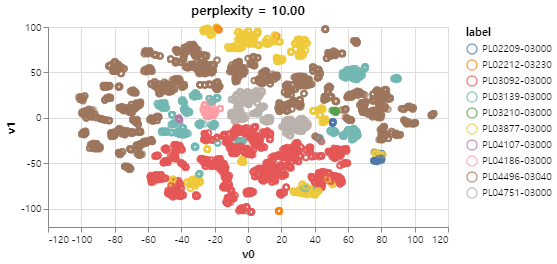

In [117]:
plots[0]    #alt.vconcat(plots[0],plots[1],plots[2],plots[3])

C:\Users\ARA\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
No handles with labels found to put in legend.


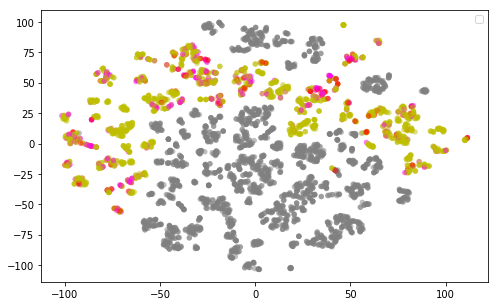

In [137]:
plt.figure(figsize=(8,5))
target_df = merged_df
target_label = 'ProductNum'
target_prod = up_list[0]

target_df['color'] = 'gray'
target_df['color'].loc[target_df['ProductNum'] == target_prod] = 'y'
target_df['color'].loc[(target_df['ProductNum'] == target_prod) & (target_df['NG_Label'] == 1)] = 'magenta'
target_df['color'].loc[(target_df['ProductNum'] == target_prod) & (target_df['NG_Label'] == 2)] = 'red'

plt.scatter(*tsne_result[10].T, s=30, linewidth=0, c=target_df.loc[randIdx]['color'], alpha=0.5)
plt.legend(loc=0)

C:\Users\ARA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
No handles with labels found to put in legend.


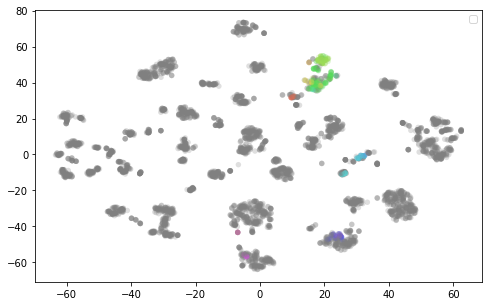

In [50]:
plt.figure(figsize=(8,5))
target_df = df
target_label = 'predict_DB'

color_palette = sns.color_palette('hls', len(np.unique(target_df[target_label])))
cluster_colors = [color_palette[int(x)] if x > 0
                  else (0.5, 0.5, 0.5)
                  for x in target_df.loc[randIdx][target_label]]

plt.scatter(*tsne_result[50].T, s=30, linewidth=0, c=cluster_colors, alpha=0.25)
plt.legend(loc='upper right')
plt.show()

In [125]:
np.unique(target_df.loc[randIdx][target_label])

C:\Users\ARA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


array([-1.,  1.,  2., ..., nan, nan, nan])

No handles with labels found to put in legend.


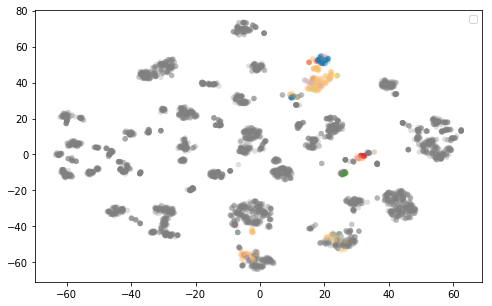

In [51]:
plt.figure(figsize=(8,5))
target_df = df
target_label = 'predict_DB'

color_palette = sns.color_palette('Paired', len(np.unique(target_df[target_label])))
cluster_colors = []
for x in randIdx:
    if x not in df.index: cluster_colors.append((0.5, 0.5, 0.5))
    else:
        cluster_colors.append(color_palette[target_df.loc[x][target_label]])
    
    
plt.scatter(*tsne_result[50].T, s=30, linewidth=0, c=cluster_colors, alpha=0.25)
plt.legend(loc='upper right')
plt.show()

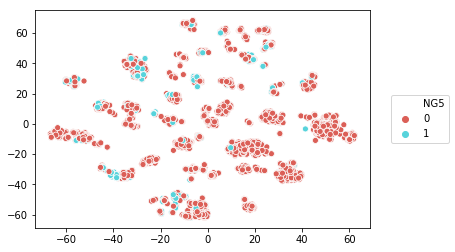

In [43]:
g= sns.scatterplot(tsne_result[50].T[0], tsne_result[50].T[1], hue=target_df[target_label][randIdx], legend='full', palette=color_palette)
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

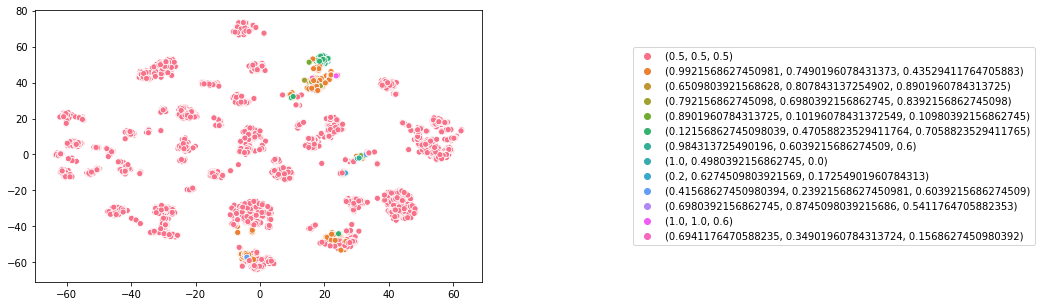

In [52]:
plt.figure(figsize=(8,5))
target_df = df
target_label = 'predict_DB'

color_palette = sns.color_palette('Paired', len(np.unique(target_df[target_label])))
cluster_colors = []
for x in randIdx:
    if x not in df.index: cluster_colors.append((0.5, 0.5, 0.5))
    else:
        cluster_colors.append(color_palette[target_df.loc[x][target_label]])

g= sns.scatterplot(tsne_result[50].T[0], tsne_result[50].T[1], hue=cluster_colors, legend='full')
g.legend(loc='right', bbox_to_anchor=(2.25, 0.5), ncol=1)
plt.show()

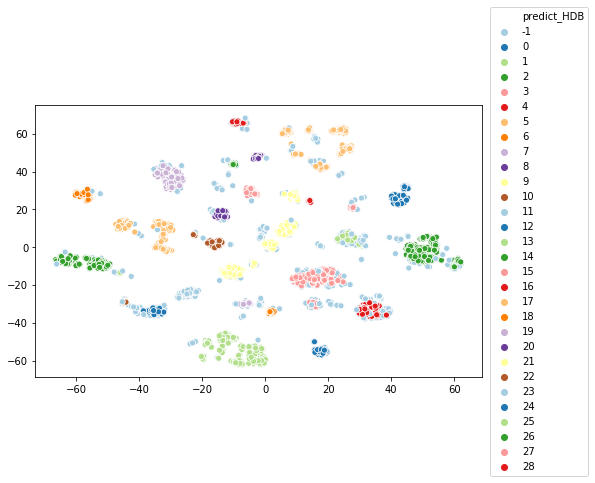

In [189]:
plt.figure(figsize=(8,5))
col = 'predict_HDB'

clr_palette = sns.color_palette('Paired', len(merged_df[col][randIdx].unique()))
g= sns.scatterplot(tsne_result[50].T[0], tsne_result[50].T[1], hue=merged_df[col][randIdx], legend='full', palette=clr_palette)
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()